In [1]:
%matplotlib notebook

In [2]:
import matplotlib.pyplot as plt
import numpy as np
#from bigfloat import *
from math import *

In [3]:
def slope(f, a, dx=0.1):
    return (f(a + dx) - f(a))/dx

In [4]:
def slope_ho(f, a, o):
    if o == 0: return f(a)
    if o == 1: return slope(f, a)
    
    return slope(lambda da: slope_ho(f, da, o-1), a)

In [5]:
def func_data(func, start=-5, stop=5, num=1000):
    assert start < stop
    
    x = np.linspace(start, stop, num)
    y = [func(x) for x in x]

    return x, y

    
def plot_func(func, color=None, label=None, **kwargs):
    x, y = func_data(func, **kwargs)

    return plt.plot(x, y, color=color, label=label)


def show_axis():
    fig = plt.figure()
    ax = fig.add_subplot(1, 1, 1)
    ax.spines['left'].set_position('center')
    ax.spines['bottom'].set_position('center')
    ax.spines['right'].set_color('none')
    ax.spines['top'].set_color('none')
    ax.xaxis.set_ticks_position('bottom')
    ax.yaxis.set_ticks_position('left')

In [6]:
def poly_to_func(poly):
    return lambda x: sum(term * (x ** order) for (order, term) in enumerate(poly))

In [7]:
def taylor(f, a=0, order=2):
    # TODO: support a != 0
    assert a == 0
    
    poly = []
    for o in range(order+1):
        poly.append(
            (slope_ho(f, a, o))/factorial(o)
        )
        
    
    return poly

In [87]:
f = lambda x: cos(x)


<IPython.core.display.Javascript object>


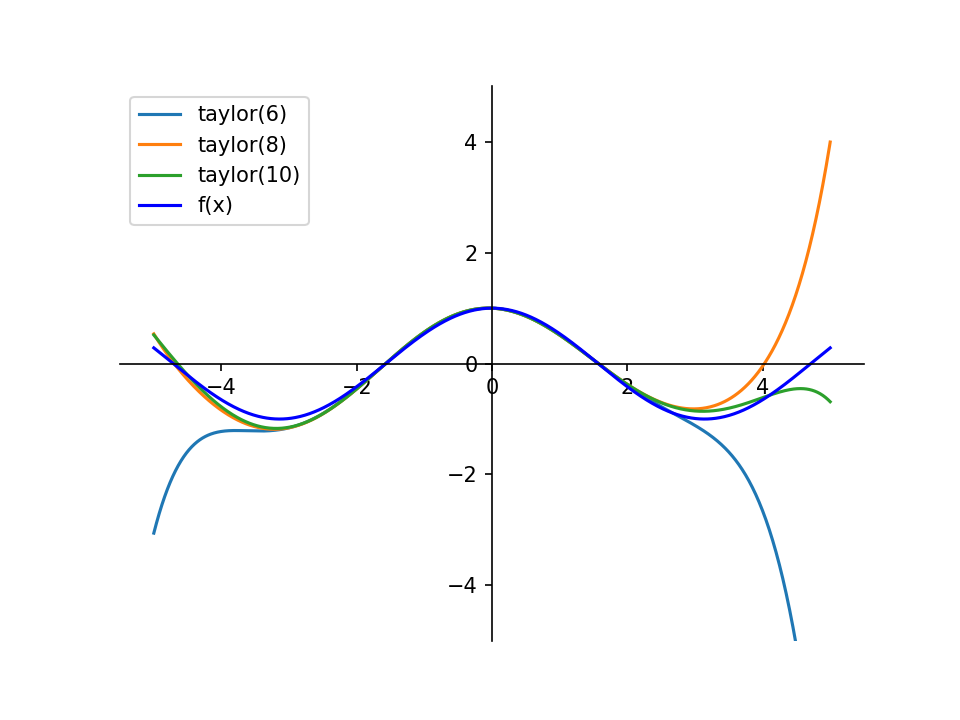

In [88]:
show_axis()

def plot_taylor(f, order):
    poly = taylor(f, order=order)
    # print(poly)
    plot_func(poly_to_func(poly), label=f'taylor({order})')


#plot_taylor(f, 2)
#plot_taylor(f, 4)
plot_taylor(f, 6)
plot_taylor(f, 8)
plot_taylor(f, 10)

plot_func(f, color='b', label='f(x)')

plt.ylim(-5, 5)

plt.legend(loc='upper left')
plt.show()

<IPython.core.display.Javascript object>


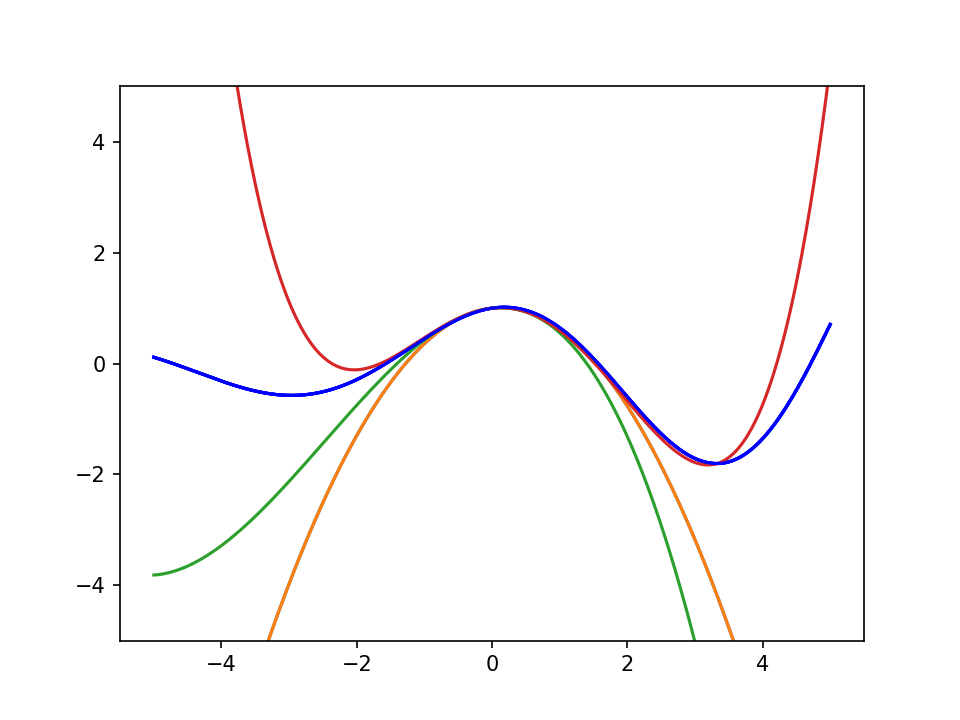

In [57]:
import matplotlib.animation as animation

#taylor_plot = plt.plot(
#    func_data(poly_to_func(taylor(f, order=1))),
#    label='taylor(x)',
#    animated=True
#)


def update(frame, *args):

    plot_taylor(f, order=frame)
    plot_func(f, color='b', label='f(x)')

    plt.ylim(-5, 5)
    
    

#plt.legend(loc='upper left')


fig = plt.figure()
ani = animation.FuncAnimation(
    fig, update, interval=1000,
    frames=range(2, 8), repeat=False
)
plt.show()

In [55]:
ani.save('animation.mp4')

<IPython.core.display.Javascript object>


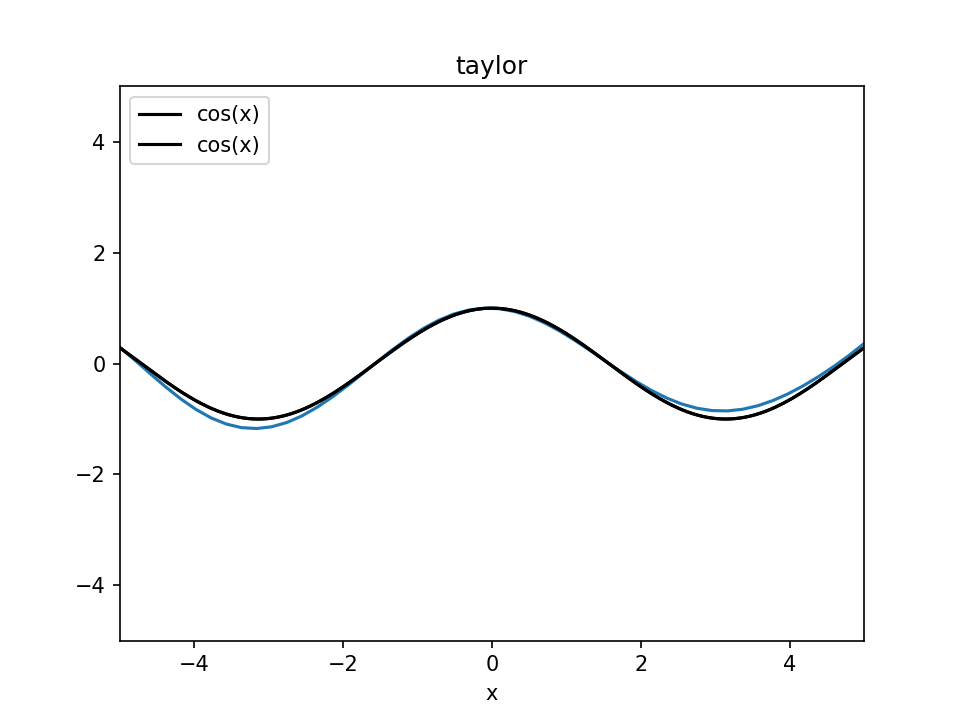

In [90]:
def update_line(num, plot, x, y):
    plot.set_ydata(taylor_f(x, order=num))
    return plot

fig1 = plt.figure()
def init():
    plot_func(cos, color='black', label='cos(x)')
    plt.legend(loc='upper left')


def taylor_f(x, order=1):
    g = poly_to_func(taylor(f, order=order))
    return np.array([g(n) for n in x])

x = np.linspace(start=-5, stop=5)
y = taylor_f(x)
plot, = plt.plot(x, y)

plt.xlim(-5, 5)
plt.ylim(-5, 5)

plt.xlabel('x')
plt.title('taylor')
ani = animation.FuncAnimation(
    fig1, update_line, range(2,13),
    init_func=init, fargs=(plot, x, y),
    interval=1000, blit=True, repeat=False
)
ani.save('animation.mp4')

In [67]:
x = np.linspace(start=-5, stop=5)
y = taylor_f(x)
plot, = plt.plot(x, y)